In [2]:
import sys
main_folder = '..'
if main_folder not in sys.path:
    sys.path.append(main_folder)

import numpy as np
import matplotlib.pyplot as plt
import torch
from mmdet.apis import init_detector, show_result_pyplot
from open_set.utils.eval.inference import inference_detector
import mmcv

/opt/conda/envs/betray/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/opt/conda/envs/betray/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# OVIS model
config_file = '../configs/demo/coco_instance_ag3x_1x.py'
checkpoint_file = '../checkpoints/coco_instance_ag3x_1x.pth'

In [5]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file)

load checkpoint from local path: ../checkpoints/coco_instance_ag3x_1x.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: panoptic_head.v2l_transform.weight, panoptic_head.v2l_transform.bias

missing keys in source state_dict: panoptic_head._v2l_transform.weight, panoptic_head._v2l_transform.bias



In [6]:
classes = model.panoptic_fusion_head.ordered_class_names
print(classes)
print(len(classes))
# Mark the novel categories by '*'
# Here we use COCO 48/17 base/novel split
unknown_cat_names = model.panoptic_head.unknown_cat_names
CLASSES = []
for name in classes:
    if name in unknown_cat_names:
        name = '*' + name
    CLASSES.append(name)
model.CLASSES = CLASSES

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'kite', 'skateboard', 'surfboard', 'bottle', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'pizza', 'donut', 'cake', 'chair', 'couch', 'bed', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'toothbrush']
65


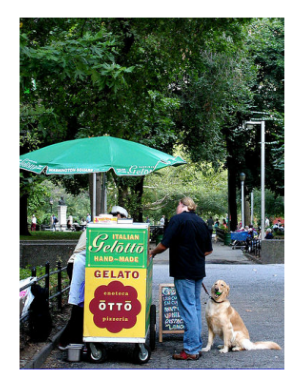

In [7]:
img = mmcv.imread('../examples/umbrella_dog.png').astype(np.uint8)
img = mmcv.bgr2rgb(img)
plt.axis('off')
plt.imshow(img)

In [8]:
# Predict segmentation results, as well as image captions
result = inference_detector(model, img, with_caption=True, logging=True)[0]

/opt/conda/envs/betray/lib/python3.10/site-packages/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
/opt/conda/envs/betray/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[CLS] there is a lot of people standing by itself. [SEP] tensor(-3.7825)
[CLS] there is a lot of people standing by the water [SEP] tensor(-4.0129)
[CLS] there is a lot of people standing by the water. [SEP] tensor(-3.9284)
[CLS] there is a lot of people standing around a field. [SEP] tensor(-3.9556)
[CLS] there is a lot of people in front of a building [SEP] tensor(-4.0548)
[CLS] there is a lot of people walking around the same size [SEP] tensor(-4.2952)
[CLS] there is a lot of people in front of a building. [SEP] tensor(-3.8159)


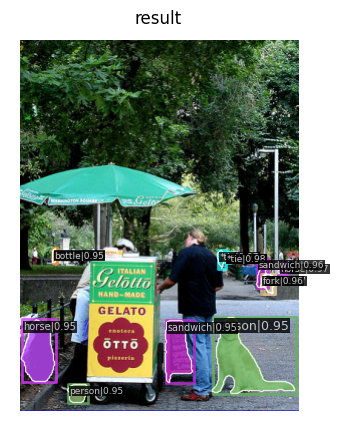

In [7]:
# show the results
show_result_pyplot(model, img, result, score_thr=0.95)

In [8]:
# OSPS model
config_file = '../configs/demo/coco_panoptic_p20.py'
checkpoint_file = '../checkpoints/coco_panoptic_p20.pth'

In [9]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file)

load checkpoint from local path: ../checkpoints/coco_panoptic_p20.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: panoptic_head.v2l_transform.weight, panoptic_head.v2l_transform.bias

missing keys in source state_dict: panoptic_head._v2l_transform.weight, panoptic_head._v2l_transform.bias



In [10]:
classes = model.CLASSES
unknown_cat_names = model.panoptic_head.unknown_cat_names
CLASSES = []
for name in classes:
    if name in unknown_cat_names:
        name = '*' + name
    CLASSES.append(name)
model.CLASSES = CLASSES
print(model.CLASSES)
print(len(model.CLASSES))

['person', '*bicycle', '*car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', '*boat', 'traffic light', 'fire hydrant', '*stop sign', 'parking meter', 'bench', 'bird', '*cat', 'dog', 'horse', 'sheep', '*cow', 'elephant', '*bear', '*zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', '*tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', '*banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', '*pizza', 'donut', '*cake', 'chair', 'couch', 'potted plant', 'bed', '*dining table', '*toilet', 'tv', 'laptop', 'mouse', 'remote', '*keyboard', 'cell phone', 'microwave', 'oven', 'toaster', '*sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'banner', 'blanket', 'bridge', 'cardboard', 'counter', 'curtain', 'door-stuff', 'floor-wood', 'flower', 'fruit', 'gravel',

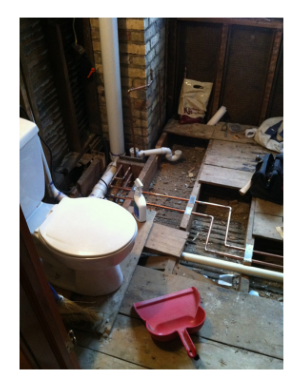

In [11]:
img = mmcv.imread('../examples/toilet.png').astype(np.uint8)
img = mmcv.bgr2rgb(img)
plt.axis('off')
plt.imshow(img)

In [12]:
# Predict segmentation results, as well as image captions
result = inference_detector(model, img, with_caption=True, logging=True)[0]

[CLS] there is a man standing next to another person [SEP] tensor(-3.7396)
[CLS] there is a man standing next to another man. [SEP] tensor(-3.6079)
[CLS] there is a man standing on top of a table [SEP] tensor(-3.6651)
[CLS] there is a man standing on top of a hill [SEP] tensor(-3.7009)
[CLS] there is a man standing on top of a hill. [SEP] tensor(-3.3723)
[CLS] there is a man standing on top of a table. [SEP] tensor(-3.5606)
[CLS] there is a man standing next to another person's hand [SEP] tensor(-3.6340)


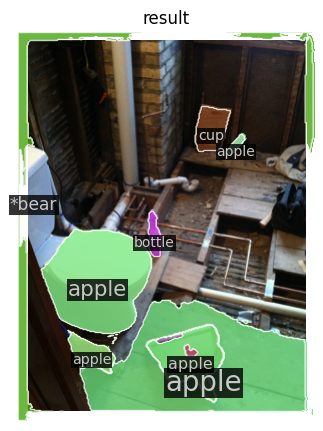

In [13]:
# show the results
show_result_pyplot(model, img, result)